In [1]:
#importation
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import sys  
sys.path.insert(0, '../scripts')
import clean_data
import utilise
import os
import clean_data

In [2]:

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(parent_dir, "data", "Week1_challenge_data_source.csv")                             
db = pd.read_csv(data_path)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,500,000,000,000,000.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,000,000,000.00","33,664,962,239.00","35,521,200,000,000.00",9.16457E+15,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,500,000,000,000,000.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,202,000,000,000.00","33,681,854,413.00","35,794,000,000,000.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,500,000,000,000,000.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,000,000,000.00","33,760,627,129.00","35,281,500,000,000.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,500,000,000,000,000.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,000,000,000.00","33,750,343,200.00","35,356,600,000,000.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,500,000,000,000,000.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,000,000,000.00","33,699,795,932.00","35,407,000,000,000.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [229]:
#rename columns
#db=db.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 
 #                                     'dur','MSISDN/Number':'msisdn','Last Location Name':'location',
  #                                    'Handset Manufacturer':'manufacturer','Handset Type':'handset'
   #                                  })

In [15]:
count_sess_usr=db['MSISDN/Number'].value_counts()
lis=count_sess_usr.values.tolist()
phone_no=count_sess_usr.index.values
sess_freq = dict(zip(phone_no, lis))
print("TOP TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION FREQUENCY\n")
print("MSISDN/Number        session frequency\n")
for key,value in list(islice(sess_freq.items(), 10)):
    print(key,'         ',value)

TOP TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION FREQUENCY

MSISDN/Number        session frequency

33626320676.0           18
33614892860.0           17
33625779332.0           17
33659725664.0           16
33760536639.0           15
33675877202.0           15
33667163239.0           13
33604515716.0           12
33603127838.0           12
33760413819.0           12


In [17]:
count_sess_dur=db.groupby('MSISDN/Number')['Dur. (ms)'].sum()
duration = count_sess_dur.values.tolist()
phone_no=count_sess_dur.index.values
sess_dur = dict(zip(phone_no, duration))

print("TOP TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION DURATION\n")
print("MSISDN/Number        session duration(ms)\n")
for key,value in list(islice(sess_dur.items(), 10)):
    print(key,'          ',value)

TOP TEN USERS CUSTOMERS WITH HIGHEST ENGAGMENT IN SESSION DURATION

MSISDN/Number        session duration(ms)

33601001722.0            116720.0
33601001754.0            181230.0
33601002511.0            134969.0
33601007832.0            49878.0
33601008617.0            37104.0
33601010682.0            253983.0
33601011634.0            128360.0
33601011959.0            86399.0
33601014694.0            495702.0
33601020306.0            124854.0


In [234]:
sum_column = db["totalUL"] + db["totalDL"]
db["totalData"] = sum_column
totalDataDF=db.groupby('msisdn')['totalData'].sum()
totalData = totalDataDF.values.tolist()
msisdn=totalDataDF.index.values

totalDataUserDictionary = dict(zip(msisdn, totalData))

for key,value in list(islice(totalDataUserDictionary.items(), 10)):
    print(key,'----------',value,'Bytes')

33601001722.0 ---------- 878690574.0 Bytes
33601001754.0 ---------- 156859643.0 Bytes
33601002511.0 ---------- 595966483.0 Bytes
33601007832.0 ---------- 422320698.0 Bytes
33601008617.0 ---------- 1457410944.0 Bytes
33601010682.0 ---------- 615217221.0 Bytes
33601011634.0 ---------- 654723066.0 Bytes
33601011959.0 ---------- 332660357.0 Bytes
33601014694.0 ---------- 990132189.0 Bytes
33601020306.0 ---------- 732463761.0 Bytes


In [237]:
userEngagementDF=pd.DataFrame(columns=['MSISDN' ,'Session Frequency','Session Duration','Total Data'])
userEngagementDF['MSISDN']=durationPerUser.keys()

userEngagementDF['Session Frequency']=userEngagementDF['MSISDN'].map(sessionPerUserDictionary)
userEngagementDF['Session Duration']=userEngagementDF['MSISDN'].map(durationPerUser)
userEngagementDF['Total Data']= userEngagementDF['MSISDN'].map(totalDataUserDictionary)

userEngagementDF.head(10)

,MSISDN,Session Frequency,Session Duration,Total Data
0,"33,601,001,722.00",1,"116,720.00","878,690,574.00"
1,"33,601,001,754.00",1,"181,230.00","156,859,643.00"
2,"33,601,002,511.00",1,"134,969.00","595,966,483.00"
3,"33,601,007,832.00",1,"49,878.00","422,320,698.00"
4,"33,601,008,617.00",2,"37,104.00","1,457,410,944.00"
5,"33,601,010,682.00",2,"253,983.00","615,217,221.00"
6,"33,601,011,634.00",2,"128,360.00","654,723,066.00"
7,"33,601,011,959.00",1,"86,399.00","332,660,357.00"
8,"33,601,014,694.00",2,"495,702.00","990,132,189.00"
9,"33,601,020,306.00",1,"124,854.00","732,463,761.00"


In [238]:
x = userEngagementDF[['Session Frequency','Session Duration','Total Data']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled,columns=['Session Frequency','Session Duration','Total Data'])

In [239]:
from sklearn.cluster import KMeans
KMean_clust= KMeans(n_clusters=3, init='k-means++',max_iter=1000)
KMean_clust.fit(normalized)

KMeans(max_iter=1000, n_clusters=3)

In [240]:
normalized['Cluster']= KMean_clust.labels_
normalized['MSISDN']= durationPerUser.keys()
normalized.sample(10)

,Session Frequency,Session Duration,Total Data,Cluster,MSISDN
1582,0.00,0.01,0.06,2,"33,605,978,795.00"
42062,0.06,0.00,0.04,2,"33,660,899,925.00"
98667,0.18,0.01,0.37,1,"33,762,813,069.00"
16033,0.18,0.01,0.25,1,"33,630,758,521.00"
45086,0.06,0.01,0.09,0,"33,661,658,062.00"
91515,0.00,0.00,0.06,2,"33,758,433,141.00"
70761,0.06,0.02,0.09,0,"33,669,016,420.00"
59086,0.12,0.02,0.19,0,"33,665,200,110.00"
61695,0.06,0.01,0.07,0,"33,666,029,901.00"
3527,0.06,0.00,0.13,0,"33,610,312,007.00"


In [241]:
metricDF=userEngagementDF[['Session Frequency','Session Duration','Total Data']]
metricDF['Cluster']=KMean_clust.labels_
clusteredSum = metricDF.groupby('Cluster').sum()

clusteredSum

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,47083,"4,621,248,076.00","24,352,088,307,347.00"
1,17259,"2,313,815,906.00","9,264,642,623,423.00"
2,84593,"8,683,773,674.00","40,216,715,580,283.00"


In [243]:
metricDF['Cluster']=KMean_clust.labels_
clusteredMin = metricDF.groupby('Cluster').min()
clusteredMin

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,2,"18,235.00","284,218,230.00"
1,3,"46,896.00","1,085,993,876.00"
2,1,"7,142.00","33,249,009.00"


In [244]:
metricDF['Cluster']=KMean_clust.labels_
clusteredMax = metricDF.groupby('Cluster').max()
clusteredMax

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,4,"3,174,824.00","1,873,330,284.00"
1,18,"18,553,754.00","8,846,226,494.00"
2,2,"1,573,420.00","950,760,661.00"


In [245]:
metricDF['Cluster']=KMean_clust.labels_
clusteredMean = metricDF.groupby('Cluster').mean()
clusteredMean

,Session Frequency,Session Duration,Total Data
Cluster,,,
0,2.18,"213,620.31","1,125,691,688.96"
1,4.25,"569,765.06","2,281,369,766.91"
2,1.04,"106,993.10","495,511,638.21"


In [246]:
# sum up download and upload data for each application
google = db['Google DL (Bytes)']+ db['Google UL (Bytes)']
email = db['Email DL (Bytes)']+ db['Email UL (Bytes)']
gaming = db['Gaming DL (Bytes)']+ db['Gaming UL (Bytes)']
youtube = db['Youtube DL (Bytes)']+ db['Youtube UL (Bytes)']
netflix = db['Netflix DL (Bytes)']+ db['Netflix UL (Bytes)']
social = db['Social Media DL (Bytes)']+ db['Social Media UL (Bytes)']

userEngagementDF['google']=google
userEngagementDF['email']=email
userEngagementDF['gaming']=gaming
userEngagementDF['youtube']=youtube
userEngagementDF['netflix']=netflix
userEngagementDF['social']=social

sumApplicationsDF=userEngagementDF.groupby('MSISDN')[['google','youtube','netflix','social','email','gaming']].sum()
sumApplicationsDF[['google']].sort_values(by ='google',ascending=False).head(10)

,google
MSISDN,
"33,760,532,824.00","15,528,782.00"
"33,662,492,962.00","15,517,324.00"
"33,684,824,997.00","15,508,567.00"
"33,651,128,952.00","15,507,131.00"
"33,609,932,989.00","15,506,449.00"
"33,663,561,775.00","15,506,141.00"
"33,688,408,549.00","15,493,921.00"
"33,699,974,451.00","15,483,654.00"
"33,632,638,205.00","15,481,311.00"


In [247]:
sumApplicationsDF[['youtube']].sort_values(by ='youtube',ascending=False).head(10)

,youtube
MSISDN,
"33,667,622,755.00","45,190,078.00"
"33,769,453,473.00","45,179,008.00"
"33,629,990,004.00","45,170,035.00"
"33,661,737,653.00","45,108,826.00"
"33,626,729,518.00","45,093,369.00"
"33,668,160,078.00","45,091,533.00"
"33,761,478,919.00","45,074,469.00"
"33,664,037,764.00","45,071,796.00"
"33,636,506,509.00","45,049,792.00"


In [248]:
sumApplicationsDF[['email']].sort_values(by ='email',ascending=False).head(10)

,email
MSISDN,
"33,661,372,513.00","4,518,036.00"
"33,699,347,344.00","4,513,579.00"
"33,628,430,878.00","4,513,000.00"
"33,664,683,534.00","4,512,730.00"
"33,652,665,765.00","4,510,915.00"
"33,781,028,402.00","4,510,178.00"
"33,681,422,676.00","4,507,049.00"
"33,661,466,191.00","4,504,056.00"
"33,763,634,053.00","4,502,041.00"


In [249]:
sumApplicationsDF[['netflix']].sort_values(by ='netflix',ascending=False).head(10)

,netflix
MSISDN,
"33,665,475,253.00","45,198,153.00"
"33,660,093,510.00","45,110,360.00"
"33,650,705,791.00","45,064,738.00"
"33,669,648,192.00","45,054,355.00"
"33,664,364,112.00","45,012,951.00"
"33,664,021,204.00","44,998,954.00"
"33,636,731,930.00","44,983,646.00"
"33,698,794,513.00","44,970,634.00"
"33,650,964,973.00","44,915,543.00"


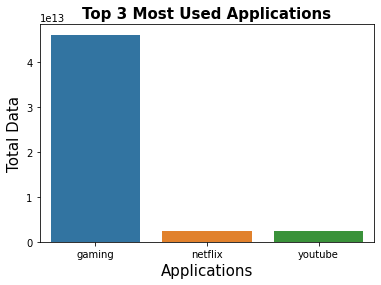

In [253]:
with warnings.catch_warnings(record=True):
    sumApplicationsDF=userEngagementDF.groupby('MSISDN')[['google','youtube','netflix','social','email','gaming']].sum()
    largestApps=sumApplicationsDF[['google','youtube','netflix','social','email','gaming']].sum().nlargest(3)
    ax=sb.barplot(largestApps.index, largestApps.values)
    ax.set_xlabel('Applications', fontsize=15)
    ax.set_ylabel('Total Data' , fontsize=15)
    ax.set_title('Top 3 Most Used Applications', fontsize=15, fontweight='bold')

In [254]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized)
    distortions.append(kmeanModel.inertia_)

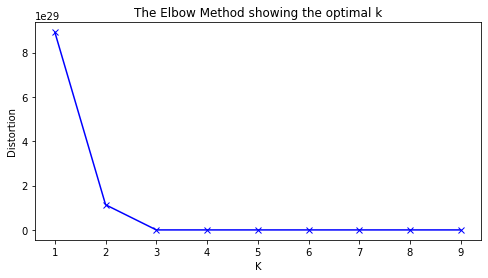

In [255]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [256]:
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(normalized)
normalized['Cluster']= KMean_clust.labels_
normalized

,Session Frequency,Session Duration,Total Data,Cluster,MSISDN
0,0.00,0.01,0.10,2,"33,601,001,722.00"
1,0.00,0.01,0.01,2,"33,601,001,754.00"
2,0.00,0.01,0.06,2,"33,601,002,511.00"
3,0.00,0.00,0.04,2,"33,601,007,832.00"
4,0.06,0.00,0.16,0,"33,601,008,617.00"
...,...,...,...,...,...
106851,0.00,0.00,0.08,2,"33,789,996,170.00"
106852,0.00,0.01,0.05,2,"33,789,997,247.00"
106853,0.00,0.05,0.02,2,"3,197,020,000,000.00"
106854,0.00,0.01,0.06,2,"337,000,000,000,000.00"


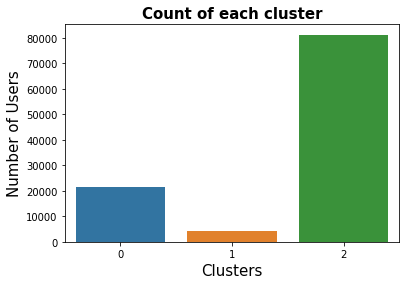

In [259]:
with warnings.catch_warnings(record=True):
    clusteredDF=normalized['Cluster'].value_counts()
    ax=sb.barplot(clusteredDF.index, clusteredDF.values)
    ax.set_xlabel('Clusters', fontsize=15)
    ax.set_ylabel('Number of Users' , fontsize=15)
    ax.set_title('Count of each cluster', fontsize=15, fontweight='bold')
    clusteredDF